**NAMED ENTITY RECOGNITION IN NEWS ARTICLE**

In [ ]:
pwd

'/content'

In [ ]:
ls

articles1.csv  sample_data/


### **Loading .csv dataset into a pandas dataframe**

In [ ]:
# reading the csv into a pandas dataframe
import pandas as pd

news_articles_df = pd.read_csv('/content/articles1.csv',encoding='utf-8',engine='python',error_bad_lines=False)

nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns')

news_articles_df.head()

<ipython-input-13-afdcc149c770>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  news_articles_df = pd.read_csv('/content/articles1.csv',encoding='utf-8',engine='python',error_bad_lines=False)


There are 8497 rows and 10 columns


Skipping line 8499: unexpected end of data


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [ ]:
#dropping the first unnamed column (axis = 1 means it's column-wise operation. So Column 0 will be dropped)

news_articles_df = news_articles_df.drop(news_articles_df.columns[0], axis = 1)

nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns')

news_articles_df.head()

There are 8497 rows and 9 columns


,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


### **Describe the data**

In [ ]:
# getting basic info about the dataset

news_articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8497 entries, 0 to 8496
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8497 non-null   int64  
 1   title        8497 non-null   object 
 2   publication  8497 non-null   object 
 3   author       8461 non-null   object 
 4   date         8497 non-null   object 
 5   year         8497 non-null   float64
 6   month        8497 non-null   float64
 7   url          0 non-null      float64
 8   content      8497 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 597.6+ KB


In [ ]:
# checking for null values, if any

news_articles_df.isnull().sum()

id                0
title             0
publication       0
author           36
date              0
year              0
month             0
url            8497
content           0
dtype: int64

### **EDA of the dataset**

<Axes: xlabel='Publications', ylabel='Counts'>

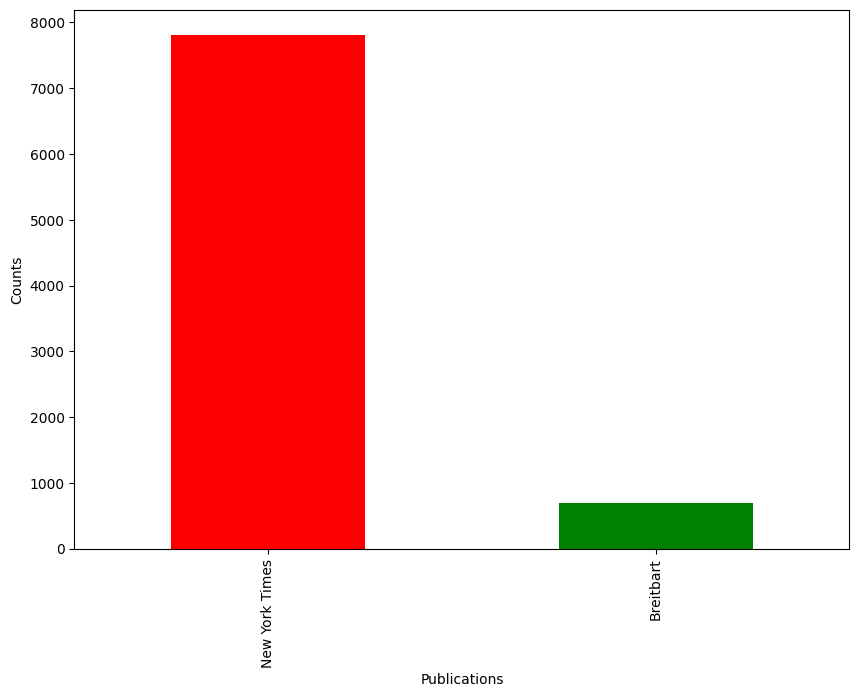

In [ ]:
# Visualization of news publications names and article count in the dataset

import matplotlib.pyplot as plt

color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,7))

plt.xlabel("Publications")
plt.ylabel("Counts")

news_articles_df.publication.value_counts().plot(kind='bar', color=color_list)



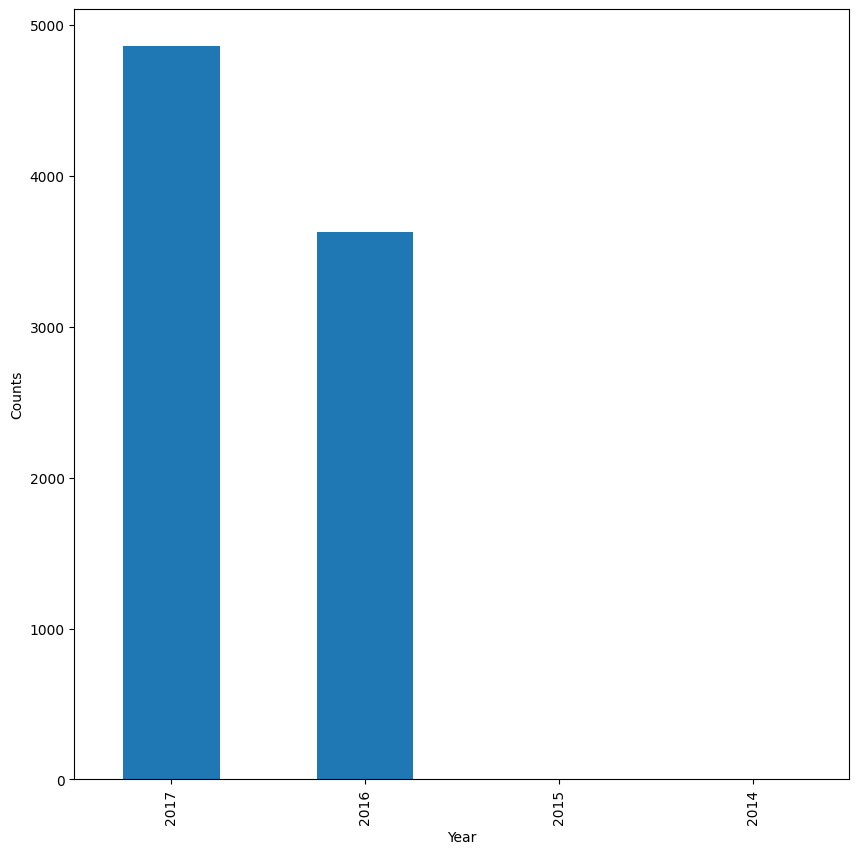

In [ ]:
# Visualization of news article count per year

news_articles_df['year'] = news_articles_df['year'].map(int).map(str)
news_articles_df['year'] = pd.to_datetime(news_articles_df['year'], format='%Y').dt.strftime('%Y')
news_articles_df = news_articles_df.sort_values(by='year')

plt.figure(figsize=(10,10))
plt.xlabel("Year")
plt.ylabel("Counts")

news_articles_df.year.value_counts().plot(kind='bar')
plt.show()

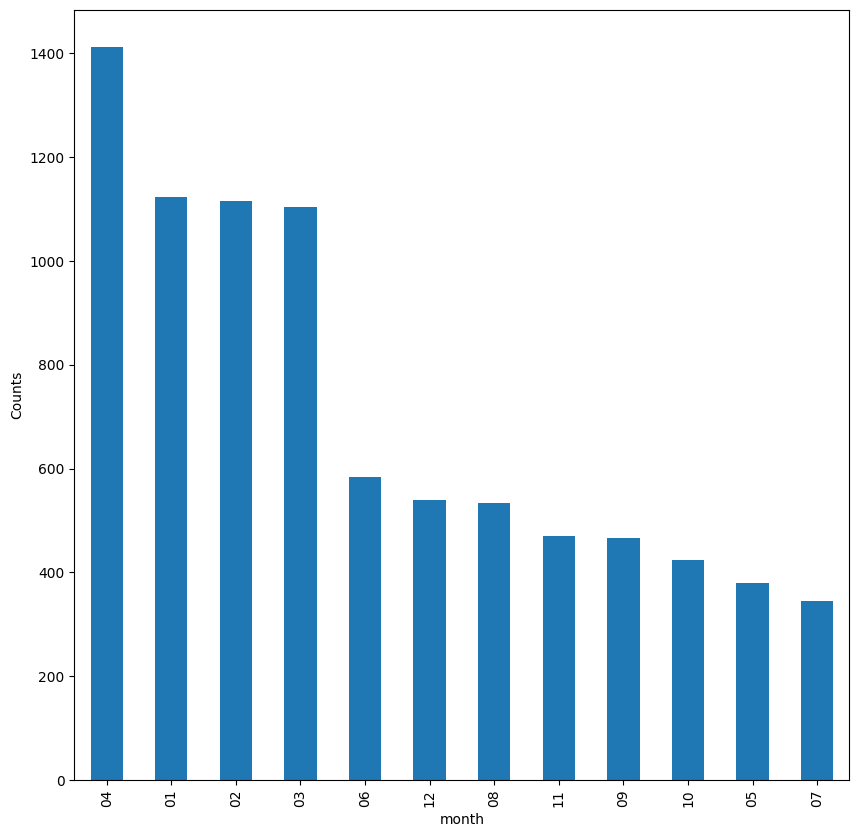

In [ ]:
# Visualization of news article count released monthly to observe if any pattern exists

news_articles_df['month'] = news_articles_df['month'].map(int).map(str)
news_articles_df['month'] = pd.to_datetime(news_articles_df['month'], format='%m').dt.strftime('%m')
news_articles_df = news_articles_df.sort_values(by='month')

plt.figure(figsize=(10,10))
plt.xlabel("month")
plt.ylabel("Counts")

news_articles_df.month.value_counts().plot(kind='bar')
plt.show()

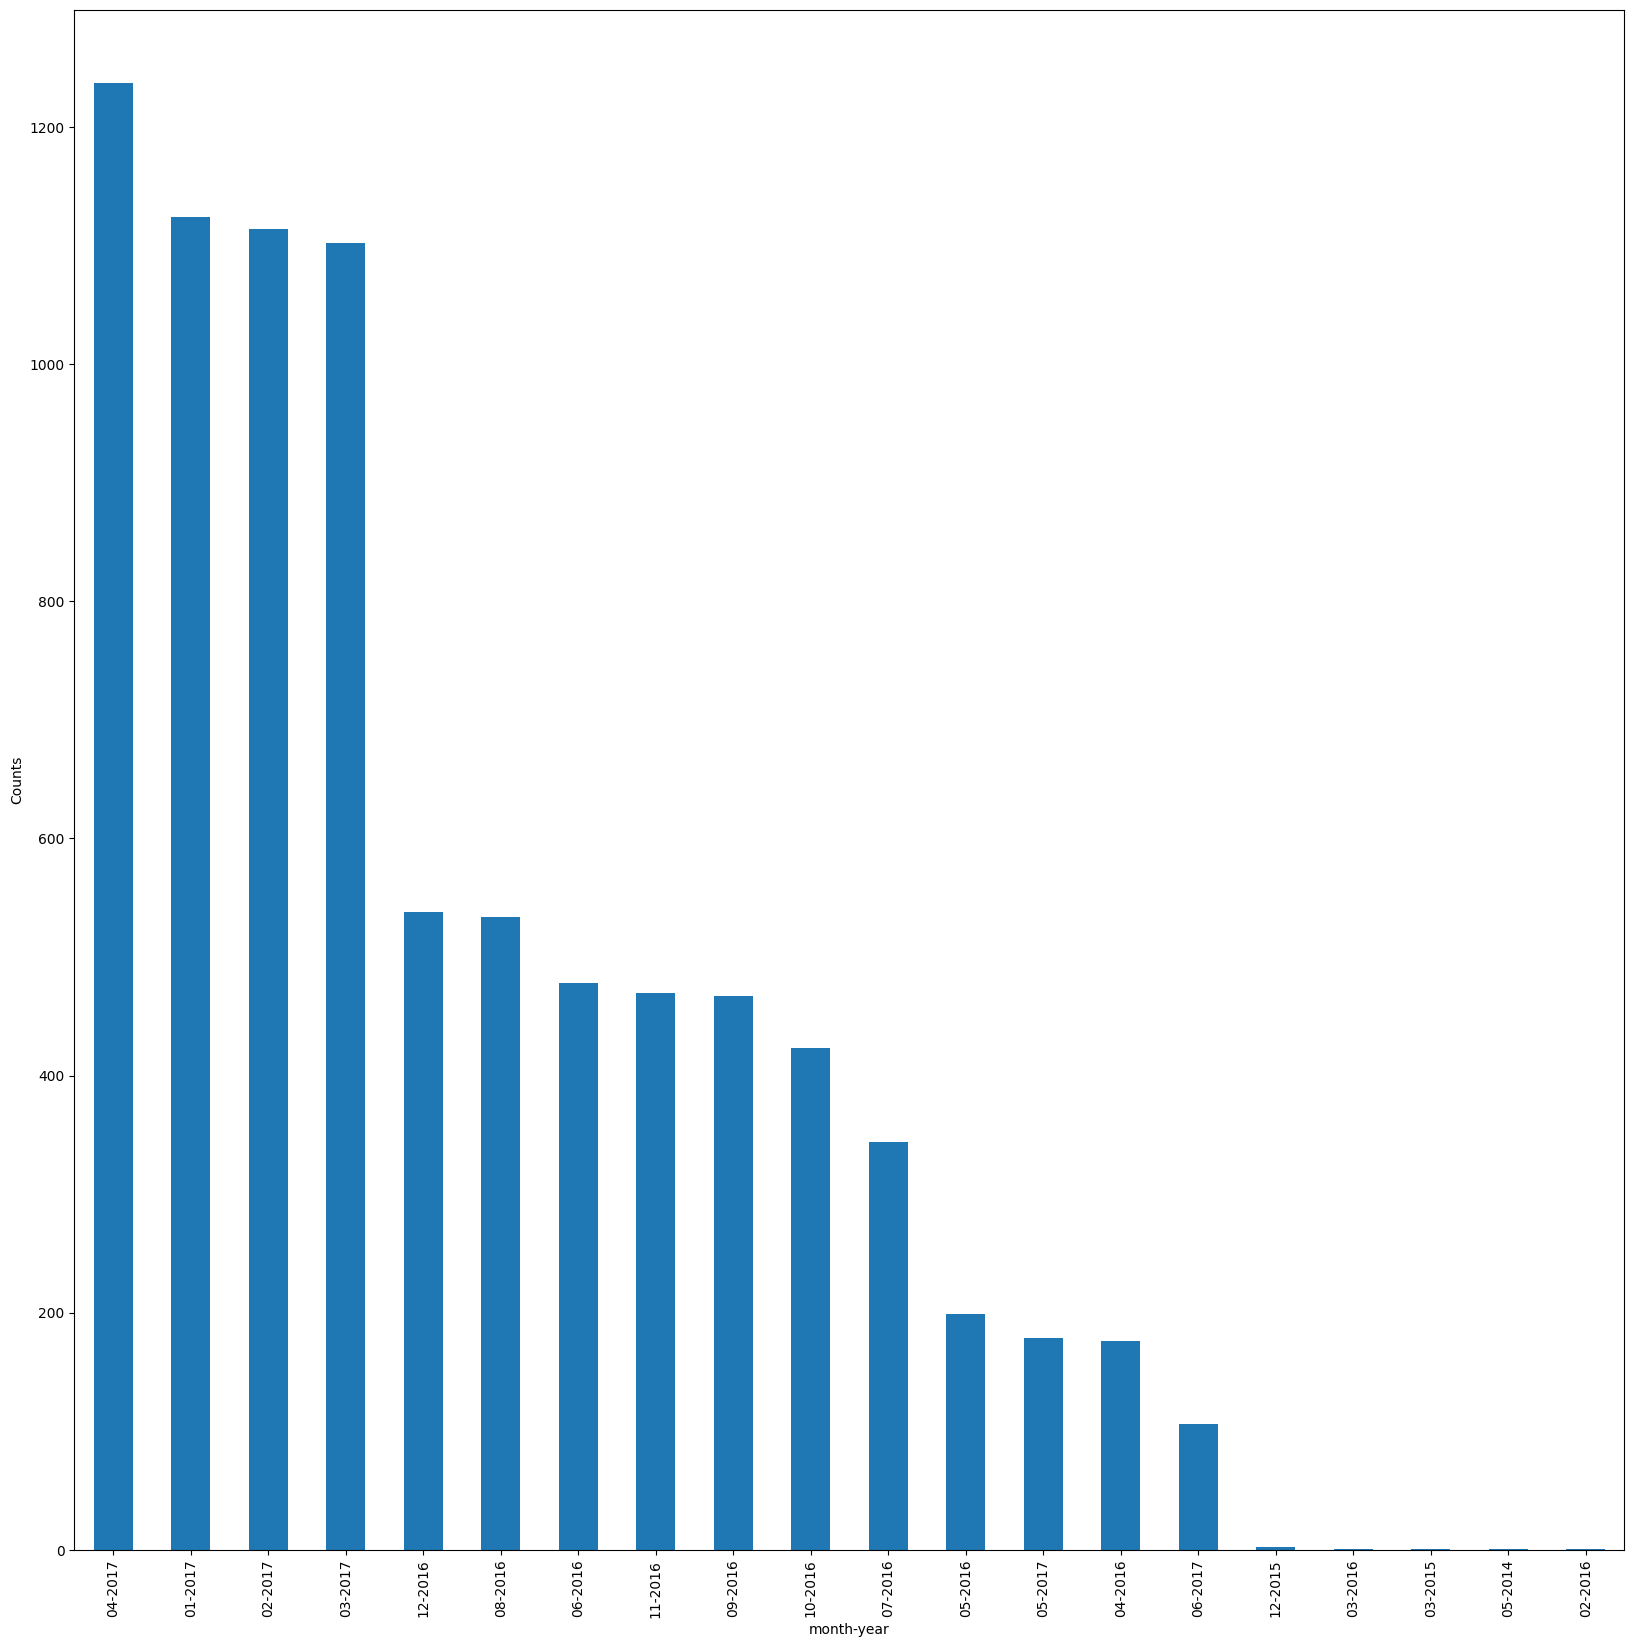

In [ ]:
# Visualization of news article count per month-year

news_articles_df['my'] = news_articles_df['month'].map(int).map(str) + '-' + news_articles_df['year'].map(int).map(str)
news_articles_df['my'] = pd.to_datetime(news_articles_df['my'], format='%m-%Y').dt.strftime('%m-%Y')
news_articles_df = news_articles_df.sort_values(by='my')

plt.figure(figsize=(20,20))
plt.xlabel("month-year")
plt.ylabel("Counts")

news_articles_df.my.value_counts().plot(kind='bar')
plt.show()

### For analysing, going with title column

In [ ]:
# initializing a new dataframe with only the title column for faster operation

title_df = news_articles_df['title']
title_df = title_df.to_frame()

title_df.sample(10, random_state = 5)

,title
7843,VIDEO: Man Allegedly High on Synthetic Street ...
4619,Talking About Sex and ‘The Affair’ With Domini...
3407,China’s Cheating Husbands Fuel an Industry of ...
7175,A Brother’s Crimes and a Sister’s Betrayal Mak...
1409,Automakers Knew of Takata Airbag Hazard for Ye...
618,That Old Phone Trump Uses for Twitter Could Be...
5194,Health Officials Split Over Advice on Pregnanc...
6268,Cause of Severe Injury at Pipeline Protest Bec...
6494,Carrie Fisher Put Pen and Voice in Service of ...
6435,"Gunmen in Jordan Kill 10, Including 7 Officers..."


<Axes: xlabel='title length', ylabel='No. of articles'>

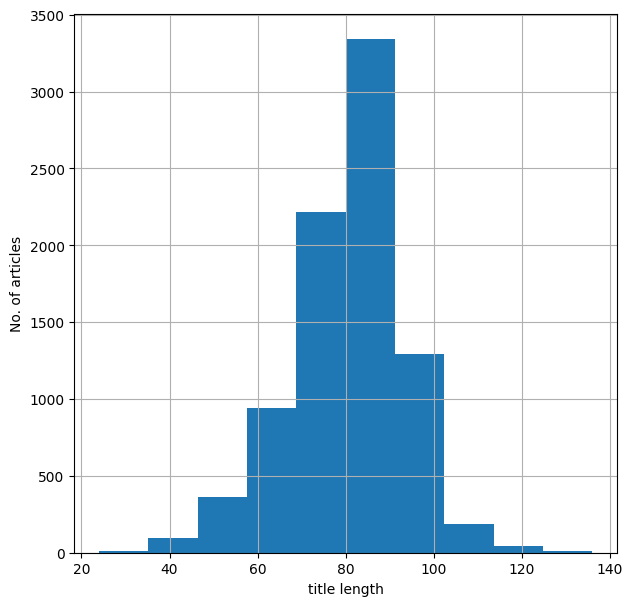

In [ ]:
# visualizing title length

plt.figure(figsize=(7,7))
plt.xlabel("title length")
plt.ylabel("No. of articles")

title_df['title'].str.len().hist()

## **Part of Speech Tagging**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Contraction Mapping

!pip install contractions
import contractions

In [ ]:
title_df['title'] = title_df['title'].apply(lambda x: [contractions.fix(word) for word in x.split()])
title_df.sample(10, random_state = 5)

,title
7843,"[VIDEO:, Man, Allegedly, High, on, Synthetic, ..."
4619,"[Talking, About, Sex, and, ‘The, Affair’, With..."
3407,"[China’s, Cheating, Husbands, Fuel, an, Indust..."
7175,"[A, Brother’s, Crimes, and, a, Sister’s, Betra..."
1409,"[Automakers, Knew, of, Takata, Airbag, Hazard,..."
618,"[That, Old, Phone, Trump, Uses, for, Twitter, ..."
5194,"[Health, Officials, Split, Over, Advice, on, P..."
6268,"[Because, of, Severe, Injury, at, Pipeline, Pr..."
6494,"[Carrie, Fisher, Put, Pen, and, Voice, in, Ser..."
6435,"[Gunmen, in, Jordan, Kill, 10,, Including, 7, ..."


In [ ]:
#joining back the list of items into one string

title_df['title'] = [' '.join(map(str, l)) for l in title_df['title']]
title_df.sample(10, random_state = 5)

,title
7843,VIDEO: Man Allegedly High on Synthetic Street ...
4619,Talking About Sex and ‘The Affair’ With Domini...
3407,China’s Cheating Husbands Fuel an Industry of ...
7175,A Brother’s Crimes and a Sister’s Betrayal Mak...
1409,Automakers Knew of Takata Airbag Hazard for Ye...
618,That Old Phone Trump Uses for Twitter Could Be...
5194,Health Officials Split Over Advice on Pregnanc...
6268,Because of Severe Injury at Pipeline Protest B...
6494,Carrie Fisher Put Pen and Voice in Service of ...
6435,"Gunmen in Jordan Kill 10, Including 7 Officers..."


In [ ]:
# Exploring individual cells

print(title_df['title'][0])
print(type(title_df['title'][0]))

House Republicans Fret About Winning Their Health Care Suit - The New York Times
<class 'str'>


In [ ]:
# Noise Cleaning - spacing, special characters, lowercasing

import regex as re
title_df['title'] = title_df['title'].str.lower()
title_df['title'] = title_df['title'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

title_df.sample(10, random_state = 5)

,title
7843,video man allegedly high on synthetic street d...
4619,talking about sex and the affair with dominic ...
3407,chinas cheating husbands fuel an industry of m...
7175,a brothers crimes and a sisters betrayal make ...
1409,automakers knew of takata airbag hazard for ye...
618,that old phone trump uses for twitter could be...
5194,health officials split over advice on pregnanc...
6268,because of severe injury at pipeline protest b...
6494,carrie fisher put pen and voice in service of ...
6435,gunmen in jordan kill 10 including 7 officers ...


In [ ]:
#nltk tokenization

title_df['tokenized_title'] = title_df['title'].apply(word_tokenize)
title_df.sample(10, random_state = 5)

,title,tokenized_title
7843,video man allegedly high on synthetic street d...,"[video, man, allegedly, high, on, synthetic, s..."
4619,talking about sex and the affair with dominic ...,"[talking, about, sex, and, the, affair, with, ..."
3407,chinas cheating husbands fuel an industry of m...,"[chinas, cheating, husbands, fuel, an, industr..."
7175,a brothers crimes and a sisters betrayal make ...,"[a, brothers, crimes, and, a, sisters, betraya..."
1409,automakers knew of takata airbag hazard for ye...,"[automakers, knew, of, takata, airbag, hazard,..."
618,that old phone trump uses for twitter could be...,"[that, old, phone, trump, uses, for, twitter, ..."
5194,health officials split over advice on pregnanc...,"[health, officials, split, over, advice, on, p..."
6268,because of severe injury at pipeline protest b...,"[because, of, severe, injury, at, pipeline, pr..."
6494,carrie fisher put pen and voice in service of ...,"[carrie, fisher, put, pen, and, voice, in, ser..."
6435,gunmen in jordan kill 10 including 7 officers ...,"[gunmen, in, jordan, kill, 10, including, 7, o..."


In [ ]:
# initializing Stop words libraries

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


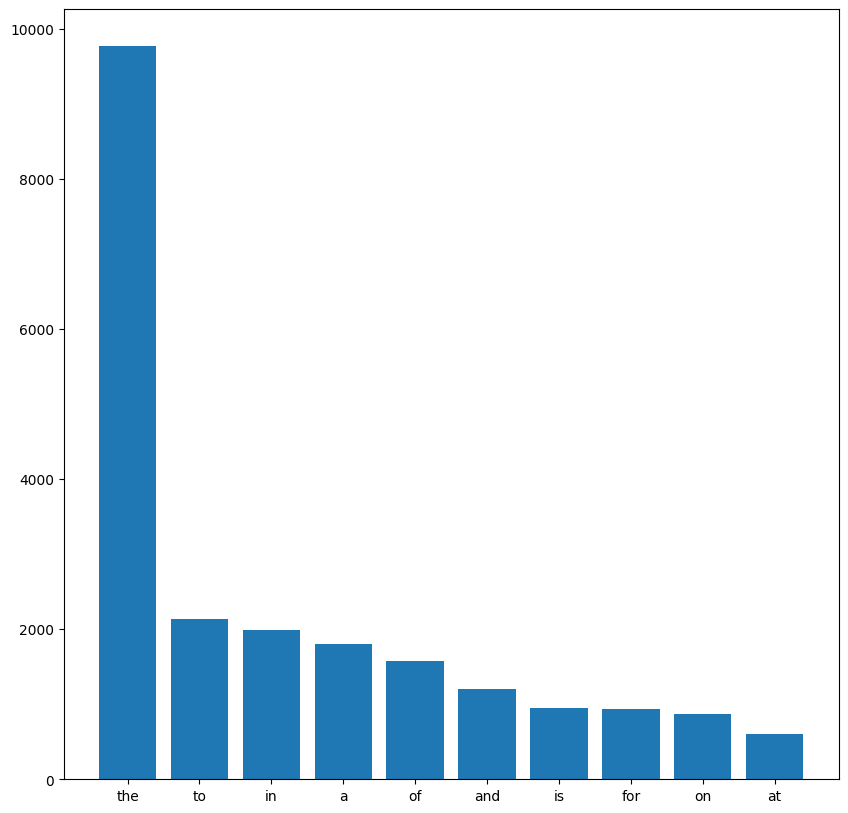

In [ ]:
# Before removing checking occurences of stopwords in headline

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(title_df['title'])


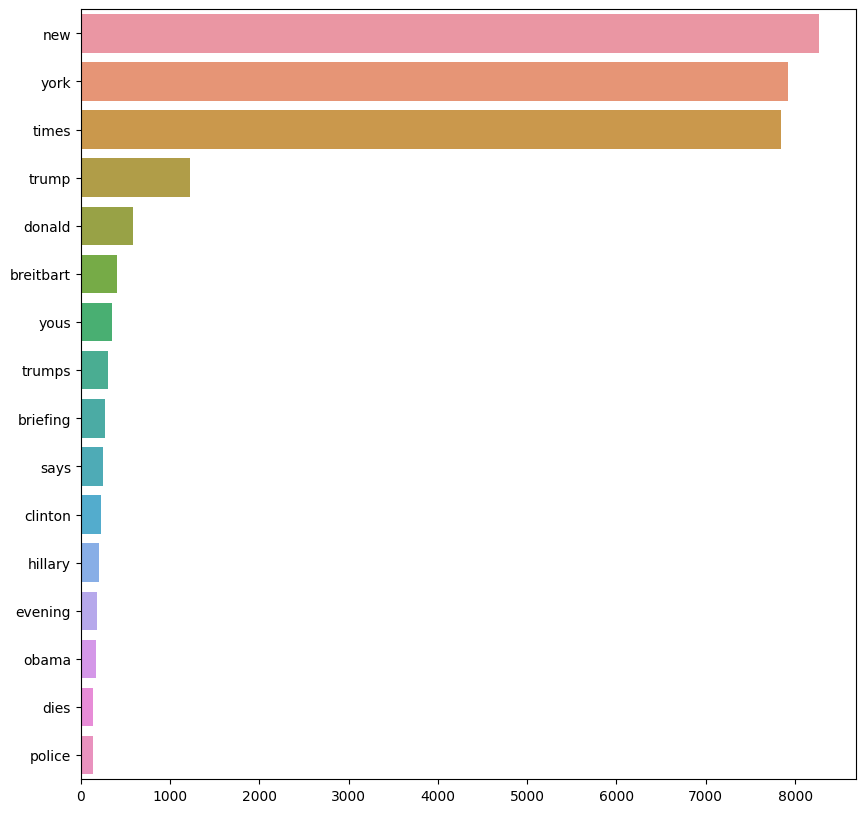

In [ ]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(title_df['title'])

In [ ]:
# Now removing stopwords

title_df['tokenized_title'] = title_df['tokenized_title'].apply(lambda x: [word for word in x if word not in stop_words])
title_df['tokenized_title_join'] = [' '.join(map(str, l)) for l in title_df['tokenized_title']]

title_df.sample(10, random_state = 5)

,title,tokenized_title,tokenized_title_join
7843,video man allegedly high on synthetic street d...,"[video, man, allegedly, high, synthetic, stree...",video man allegedly high synthetic street drug...
4619,talking about sex and the affair with dominic ...,"[talking, sex, affair, dominic, west, new, yor...",talking sex affair dominic west new york times
3407,chinas cheating husbands fuel an industry of m...,"[chinas, cheating, husbands, fuel, industry, m...",chinas cheating husbands fuel industry mistres...
7175,a brothers crimes and a sisters betrayal make ...,"[brothers, crimes, sisters, betrayal, make, ju...",brothers crimes sisters betrayal make judas du...
1409,automakers knew of takata airbag hazard for ye...,"[automakers, knew, takata, airbag, hazard, yea...",automakers knew takata airbag hazard years sui...
618,that old phone trump uses for twitter could be...,"[old, phone, trump, uses, twitter, could, open...",old phone trump uses twitter could opening sec...
5194,health officials split over advice on pregnanc...,"[health, officials, split, advice, pregnancy, ...",health officials split advice pregnancy zika a...
6268,because of severe injury at pipeline protest b...,"[severe, injury, pipeline, protest, becomes, n...",severe injury pipeline protest becomes new poi...
6494,carrie fisher put pen and voice in service of ...,"[carrie, fisher, put, pen, voice, service, bip...",carrie fisher put pen voice service bipolar pr...
6435,gunmen in jordan kill 10 including 7 officers ...,"[gunmen, jordan, kill, 10, including, 7, offic...",gunmen jordan kill 10 including 7 officers can...


In [ ]:
# for sake of simplicity, showing 10 titles based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in title_df['tokenized_title'].sample(10, random_state = 5):
  tagged_word = nltk.pos_tag(word)
  print(tagged_word)

  tagged_stanzas.append(tagged_word)

# Taking two values
tagged.append(tagged_stanzas)

[('video', 'NN'), ('man', 'NN'), ('allegedly', 'RB'), ('high', 'JJ'), ('synthetic', 'JJ'), ('street', 'NN'), ('drug', 'NN'), ('tries', 'VBZ'), ('bite', 'JJ'), ('officers', 'NNS'), ('repeatedly', 'RB'), ('tasered', 'VBD'), ('breitbart', 'NN')]
[('talking', 'VBG'), ('sex', 'NN'), ('affair', 'NN'), ('dominic', 'JJ'), ('west', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('times', 'NNS')]
[('chinas', 'NNS'), ('cheating', 'VBG'), ('husbands', 'NNS'), ('fuel', 'JJ'), ('industry', 'NN'), ('mistress', 'NN'), ('dispellers', 'NNS'), ('new', 'JJ'), ('york', 'NN'), ('times', 'NNS')]
[('brothers', 'NNS'), ('crimes', 'NNS'), ('sisters', 'NNS'), ('betrayal', 'VBP'), ('make', 'VBP'), ('judas', 'JJ'), ('dutch', 'NN'), ('best', 'JJS'), ('seller', 'NN'), ('new', 'JJ'), ('york', 'NN'), ('times', 'NNS')]
[('automakers', 'NNS'), ('knew', 'VBD'), ('takata', 'NNS'), ('airbag', 'RB'), ('hazard', 'VBP'), ('years', 'NNS'), ('suit', 'NN'), ('says', 'VBZ'), ('new', 'JJ'), ('york', 'NN'), ('times', 'NNS')]
[('old', 'JJ'),

In [ ]:
# Installing the yellowbrick
!pip install -U yellowbrick

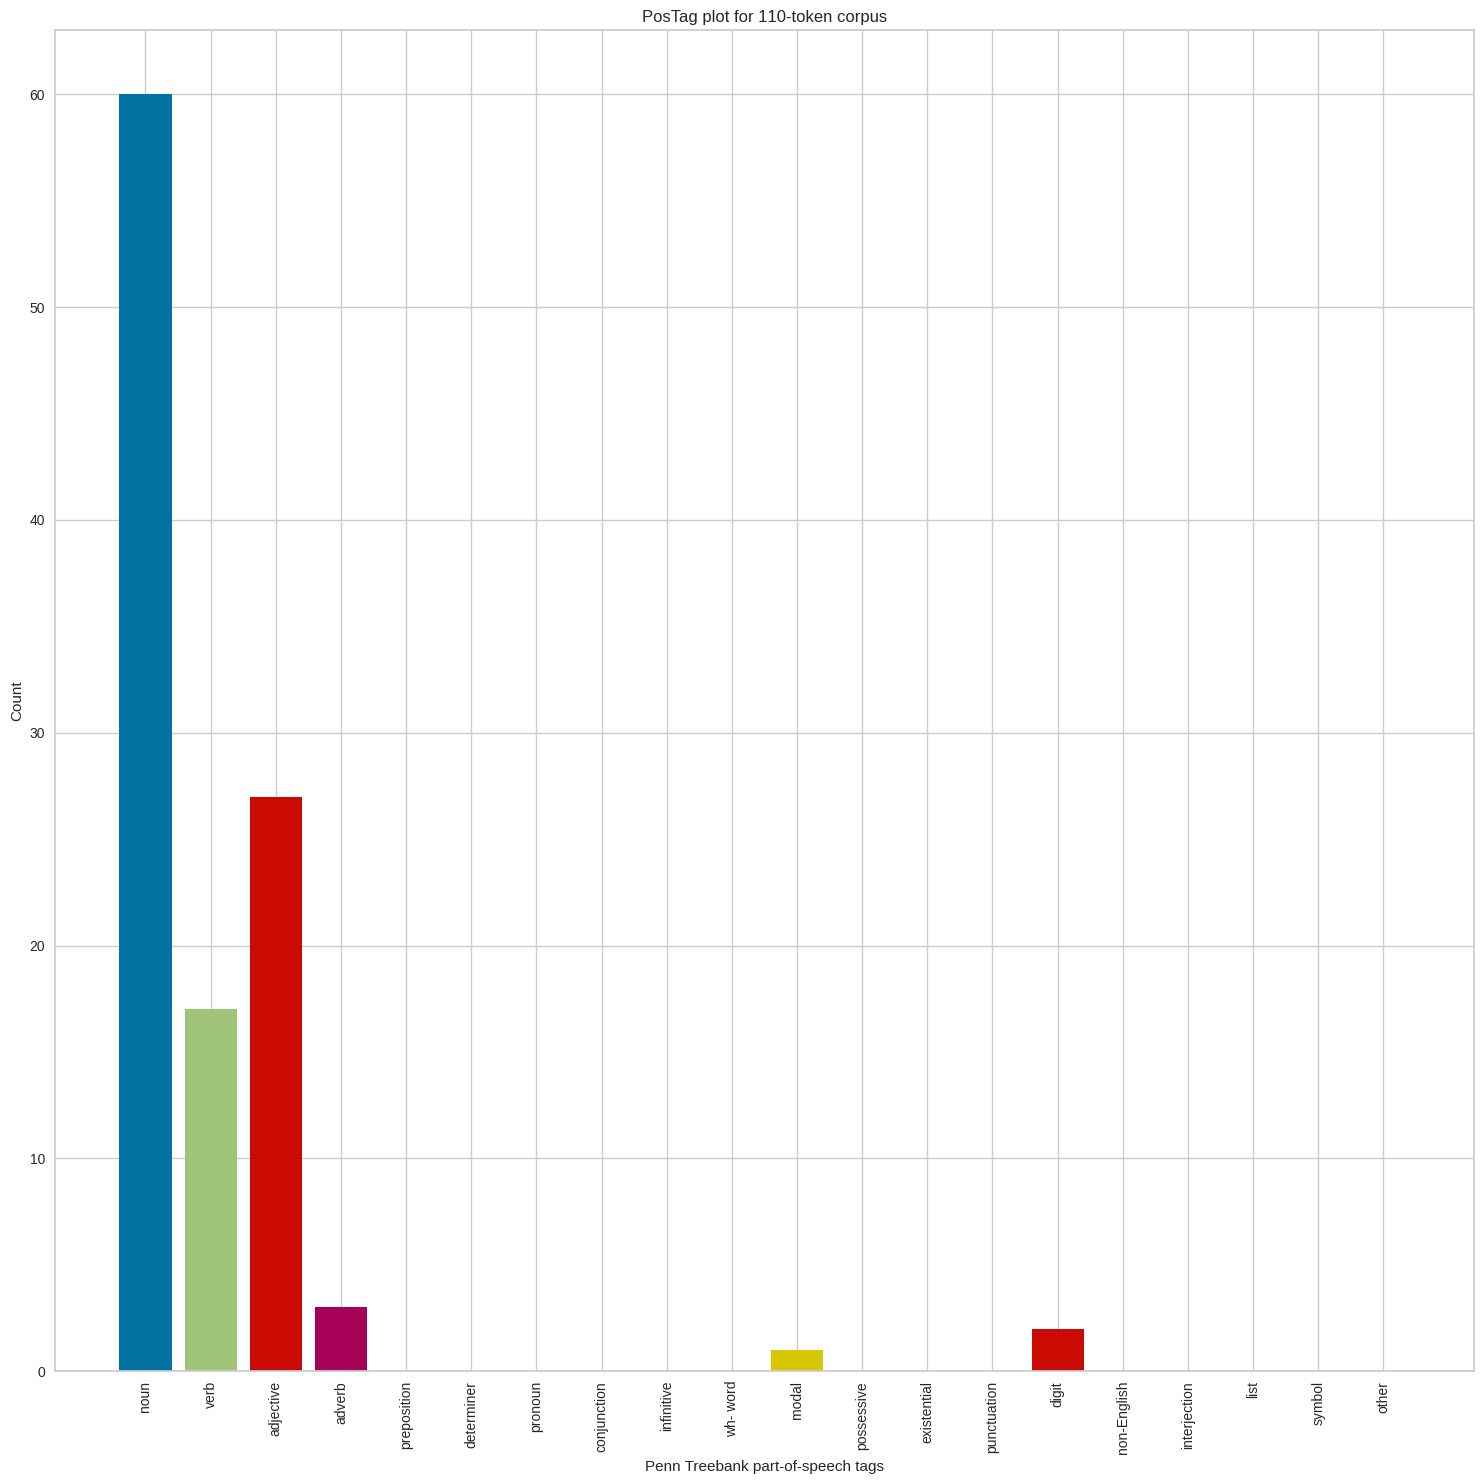

<Axes: title={'center': 'PosTag plot for 110-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [ ]:
# Creating the visualizer

from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()


## Shallow Parsing or Chunking

In [ ]:
import nltk

for sentence in tagged_stanzas:
  print(sentence)
  pattern = "NP: {<DT>?<JJ>*<NN>}"
  NPChunker = nltk.RegexpParser(pattern)
  result = NPChunker.parse(sentence)
  result.pprint()
  print()

[('video', 'NN'), ('man', 'NN'), ('allegedly', 'RB'), ('high', 'JJ'), ('synthetic', 'JJ'), ('street', 'NN'), ('drug', 'NN'), ('tries', 'VBZ'), ('bite', 'JJ'), ('officers', 'NNS'), ('repeatedly', 'RB'), ('tasered', 'VBD'), ('breitbart', 'NN')]
(S
  (NP video/NN)
  (NP man/NN)
  allegedly/RB
  (NP high/JJ synthetic/JJ street/NN)
  (NP drug/NN)
  tries/VBZ
  bite/JJ
  officers/NNS
  repeatedly/RB
  tasered/VBD
  (NP breitbart/NN))

[('talking', 'VBG'), ('sex', 'NN'), ('affair', 'NN'), ('dominic', 'JJ'), ('west', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('times', 'NNS')]
(S
  talking/VBG
  (NP sex/NN)
  (NP affair/NN)
  (NP dominic/JJ west/JJ new/JJ york/NN)
  times/NNS)

[('chinas', 'NNS'), ('cheating', 'VBG'), ('husbands', 'NNS'), ('fuel', 'JJ'), ('industry', 'NN'), ('mistress', 'NN'), ('dispellers', 'NNS'), ('new', 'JJ'), ('york', 'NN'), ('times', 'NNS')]
(S
  chinas/NNS
  cheating/VBG
  husbands/NNS
  (NP fuel/JJ industry/NN)
  (NP mistress/NN)
  dispellers/NNS
  (NP new/JJ york/NN)
  tim

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp

### Dependency Parsing

In [ ]:
from spacy import displacy

for sentence in title_df['title'].sample(5, random_state = 5):
  sentence_doc = nlp(sentence)

  displacy.render(sentence_doc, style='dep', jupyter=True)
  print("Sentence is: ", sentence_doc)

Sentence is:  video man allegedly high on synthetic street drug tries to bite officers after they repeatedly tasered him  breitbart


Sentence is:  talking about sex and the affair with dominic west  the new york times


Sentence is:  chinas cheating husbands fuel an industry of mistress dispellers  the new york times


Sentence is:  a brothers crimes and a sisters betrayal make judas a dutch best seller  the new york times


Sentence is:  automakers knew of takata airbag hazard for years suit says  the new york times


### Shallow Parsing using SpaCy

In [ ]:
# Extracting Noun Phrases

for sentence in title_df['title'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)

  for chunk in sentence_doc.noun_chunks:
    print ("Chunked noun phrases found: ",chunk)
  print()

Sentence is:  video man allegedly high on synthetic street drug tries to bite officers after they repeatedly tasered him  breitbart
Chunked noun phrases found:  video man
Chunked noun phrases found:  synthetic street drug
Chunked noun phrases found:  officers
Chunked noun phrases found:  they
Chunked noun phrases found:  him
Chunked noun phrases found:  breitbart

Sentence is:  talking about sex and the affair with dominic west  the new york times
Chunked noun phrases found:  sex
Chunked noun phrases found:  the affair
Chunked noun phrases found:  dominic west

Sentence is:  chinas cheating husbands fuel an industry of mistress dispellers  the new york times
Chunked noun phrases found:  chinas
Chunked noun phrases found:  cheating husbands
Chunked noun phrases found:  an industry
Chunked noun phrases found:  mistress dispellers

Sentence is:  a brothers crimes and a sisters betrayal make judas a dutch best seller  the new york times
Chunked noun phrases found:  a brothers crimes
Chunke

In [ ]:
# Extracting Verb Phrases
! pip install textacy

In [ ]:
import textacy
import warnings
warnings.filterwarnings("ignore")

pattern = r'(<VERB>?<ADV>*<VERB>+)'

for sentence in title_df['title'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)

sentence_doc = textacy.make_spacy_doc(sentence, lang='en_core_web_sm')
verb_phrases = textacy.extract.regex_matches(sentence_doc, pattern)

# Print all Verb Phrase
for chunk in verb_phrases:
  print("Verb Phrase found: ",chunk.text)




Sentence is:  video man allegedly high on synthetic street drug tries to bite officers after they repeatedly tasered him  breitbart
Sentence is:  talking about sex and the affair with dominic west  the new york times
Sentence is:  chinas cheating husbands fuel an industry of mistress dispellers  the new york times
Sentence is:  a brothers crimes and a sisters betrayal make judas a dutch best seller  the new york times
Sentence is:  automakers knew of takata airbag hazard for years suit says  the new york times


### Named Entity Recognition (NER) with SpaCy

In [ ]:
for sentence in title_df['title'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)
  print()

Sentence is:  video man allegedly high on synthetic street drug tries to bite officers after they repeatedly tasered him  breitbart



Sentence is:  talking about sex and the affair with dominic west  the new york times



Sentence is:  chinas cheating husbands fuel an industry of mistress dispellers  the new york times



Sentence is:  a brothers crimes and a sisters betrayal make judas a dutch best seller  the new york times



Sentence is:  automakers knew of takata airbag hazard for years suit says  the new york times


In [ ]:
# Now let's take a look at one whole piece of news to get a better context of NER extractions

for sentence in news_articles_df['content'].sample(1, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)


Sentence is:  A Kentucky man allegedly overdosed on a synthetic street drug and tried to bite officers after they repeatedly tasered him, video footage of the incident shows. [The video shows Lexington police officers trying to help the man stand up while his legs buckle under him.   Suddenly, the man, who is reportedly high on a drug called Serenity, gets a surge of energy and fights the officers who are trying to subdue him with his mouth open. “Get off me,” one officer shouts as the man growls at him. Both officers take out their tasers to subdue the man. “Sometimes force has to be used to take them into custody if they are combating against us,” Lexington Police Sgt. Jervis Middleton told WKYT. “You know, we try to make that the last line of activity for that situation but sometimes force will have to be used. ” In the video, the man smashes his head through a store window as he flails at the officers, sending glass shattering all over the place. He is on the ground writhing in the

In [ ]:
from tqdm import tqdm, tqdm_notebook

nlp = spacy.load('en_core_web_sm',disable=['parser', 'tagger','textcat'])

In [ ]:
frames = []
for i in tqdm_notebook(range(1000)):
    doc = news_articles_df.loc[i,'content']
    text_id = news_articles_df.loc[i,'id']
    doc = nlp(doc)

    ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents if len(e.text.strip(' -—')) > 0]
    frame = pd.DataFrame(ents)
    frame['id'] = text_id
    frames.append(frame)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
ner = pd.concat(frames)
ner.columns = ['Text','Start','Stop','NER_Type','id']
ner.tail()

,Text,Start,Stop,NER_Type,id
54,French,2974,2980,NORP,18417
55,Paris,3014,3019,GPE,18417
56,France,3024,3030,GPE,18417
57,France,3047,3053,GPE,18417
58,third,3064,3069,ORDINAL,18417


<Axes: xlabel='NER Types', ylabel='Counts'>

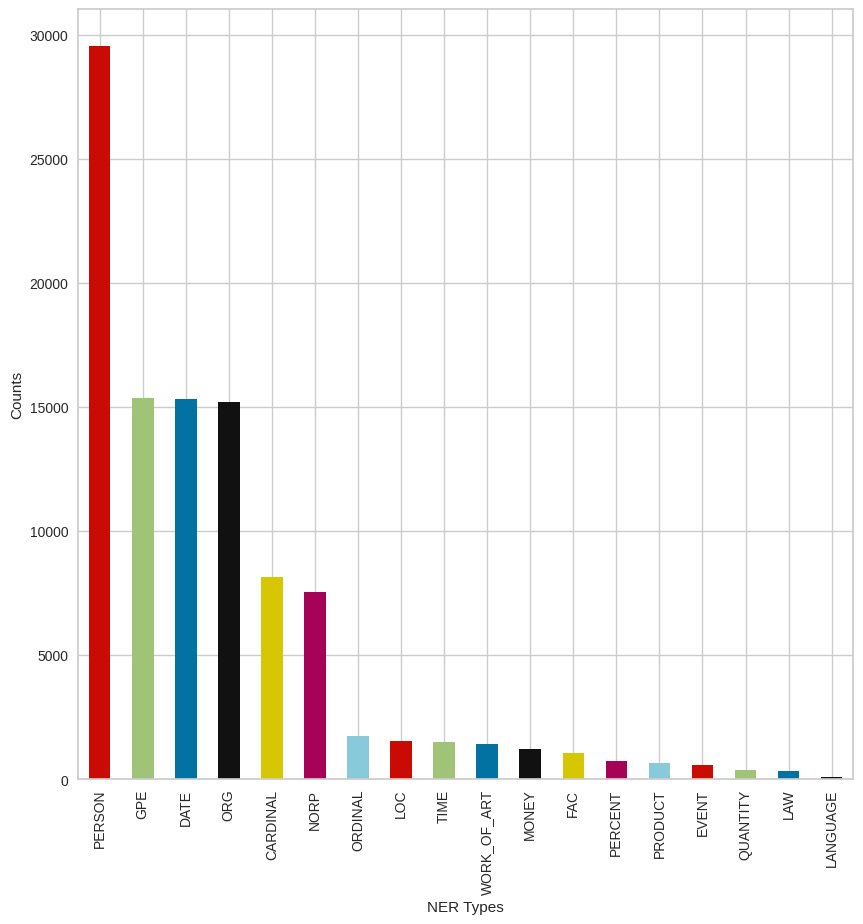

In [ ]:
color_list = list('rgbkymc')
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner.NER_Type.value_counts().plot(kind='bar', color = color_list)

<Axes: xlabel='Top 20 people mentioned', ylabel='Counts'>

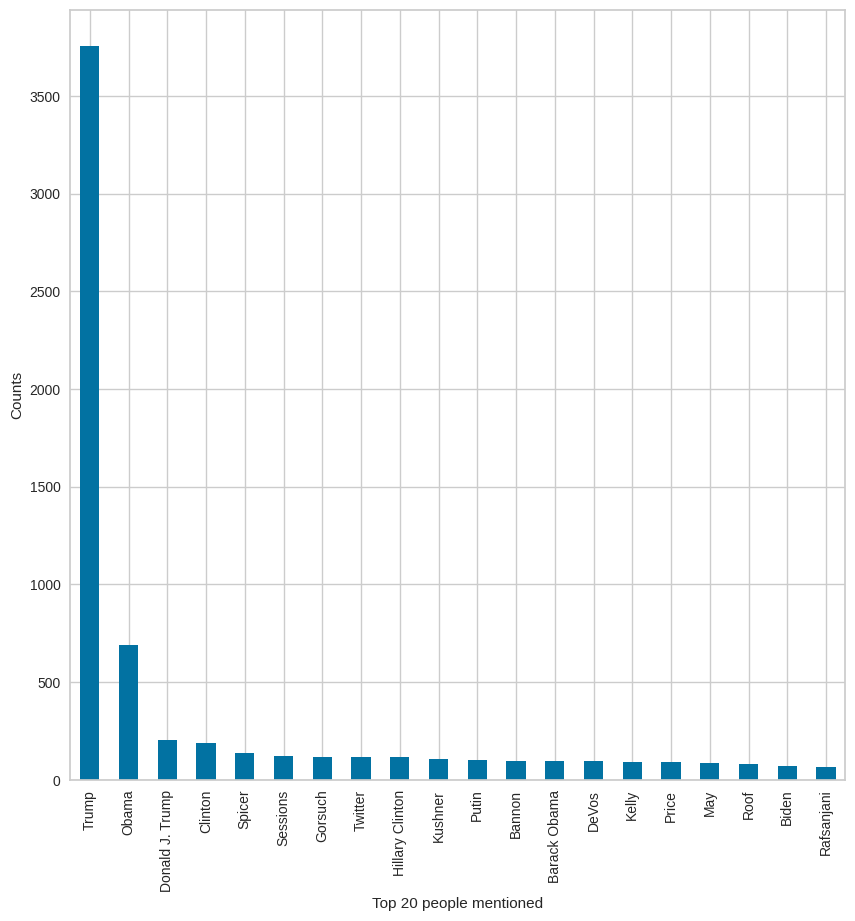

In [ ]:
person = ner[ner.NER_Type == 'PERSON']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 people mentioned")
plt.ylabel("Counts")

person.Text.value_counts()[:20].plot(kind='bar')

<Axes: xlabel='Top 20 Organizations mentioned', ylabel='Counts'>

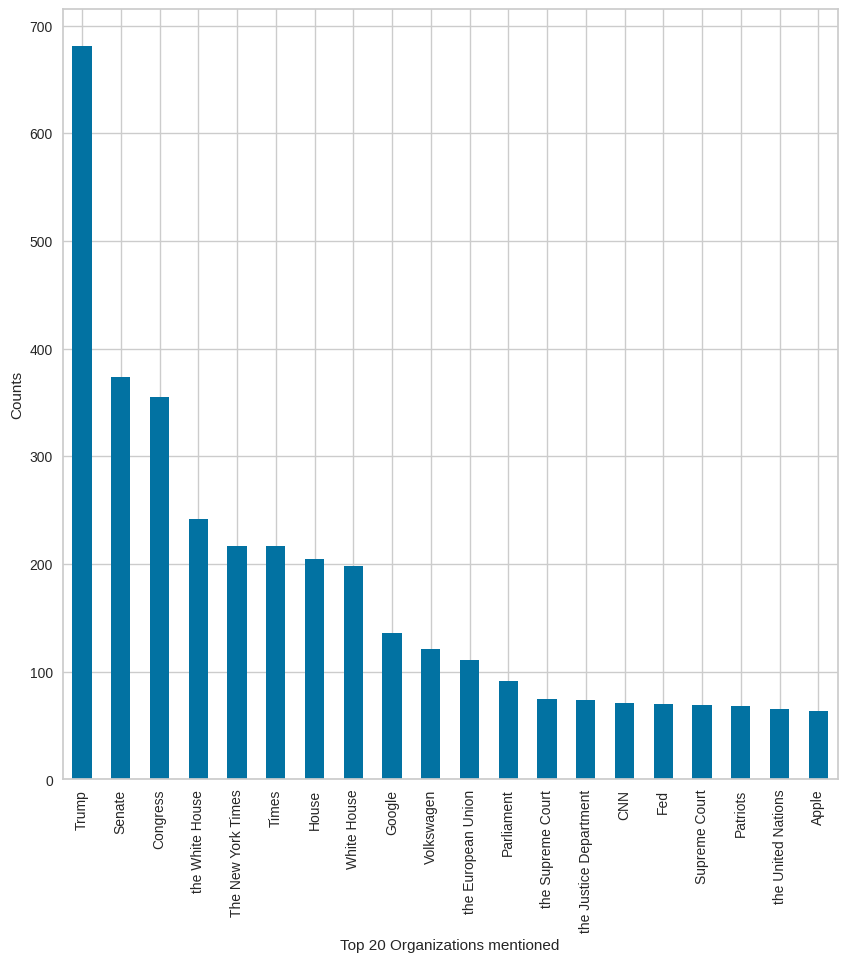

In [ ]:
orgs = ner[ner.NER_Type == 'ORG']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Organizations mentioned")
plt.ylabel("Counts")

orgs.Text.value_counts()[:20].plot(kind='bar')

<Axes: xlabel='Top 20 Places mentioned', ylabel='Counts'>

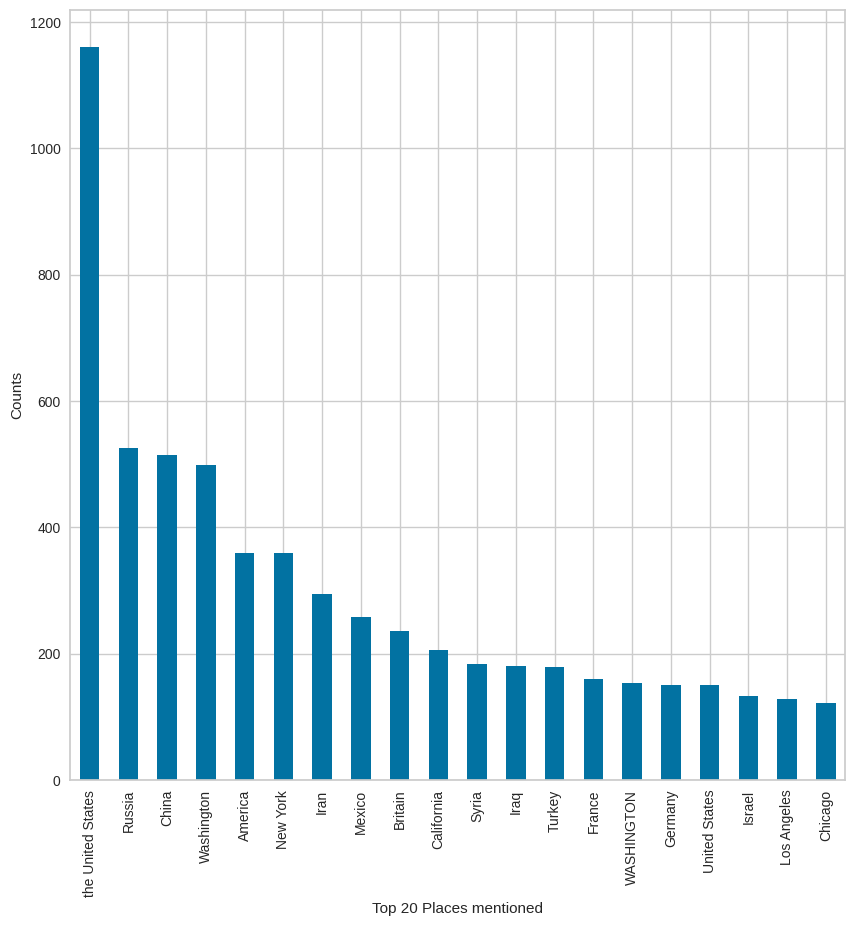

In [ ]:
place = ner[ner.NER_Type == 'GPE']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Places mentioned")
plt.ylabel("Counts")

place.Text.value_counts()[:20].plot(kind='bar')

## N-Grams

In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

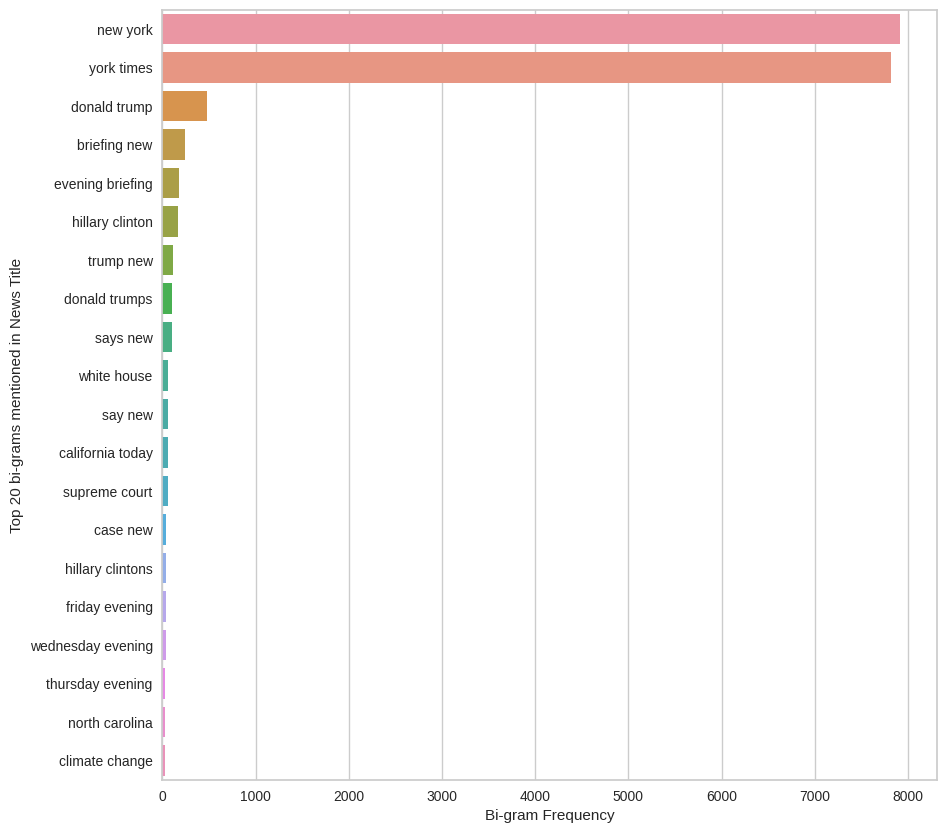

In [ ]:
#Bi-grams

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 bi-grams mentioned in News Title")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(title_df['tokenized_title_join'],2)

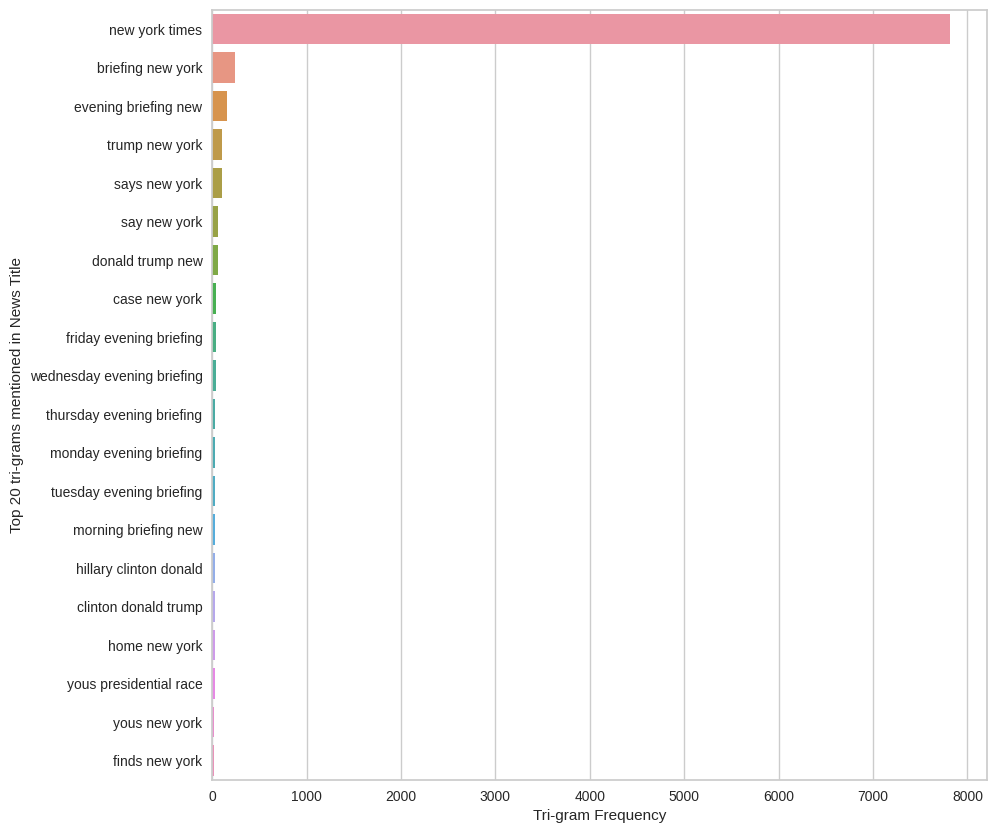

In [ ]:
#Tri-grams

def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Tri-gram Frequency")
    plt.ylabel("Top 20 tri-grams mentioned in News Title")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(title_df['tokenized_title_join'],3)